# -----------------------
# 1. Hamming Coding
# -----------------------

In [15]:
def hammingEncode(data):
    d = list(map(int, data))
    code = ['p1', 'p2', d[0], 'p3', d[1], d[2], d[3]]
    code[0] = code[2]^code[4]^code[6]
    code[1] = code[2]^code[5]^code[6]
    code[3] = code[4]^code[5]^code[6]
    return code

def hammingDetectCorrect(code):
    p1 = code[0]^code[2]^code[4]^code[6]
    p2 = code[1]^code[2]^code[5]^code[6]
    p3 = code[3]^code[4]^code[5]^code[6]
    
    error_pos = p1*1 + p2*2 + p3*4
    if error_pos:
        print(f'Error detect at position {error_pos}')
        code[error_pos - 1] ^= 1
        print(f'Error Corrected.')
    else:
        print('No error detected')

    return code

data = '1011'
encoded = hammingEncode(data)
print(encoded)

received = encoded.copy()
received[4] ^= 1
print(received)

correct = hammingDetectCorrect(received)
print(correct)


[0, 1, 1, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1]
Error detect at position 5
Error Corrected.
[0, 1, 1, 0, 0, 1, 1]


# ------------------------------------------
# 2. Line Coding (NRZ, RZ, Manchester)
# ------------------------------------------

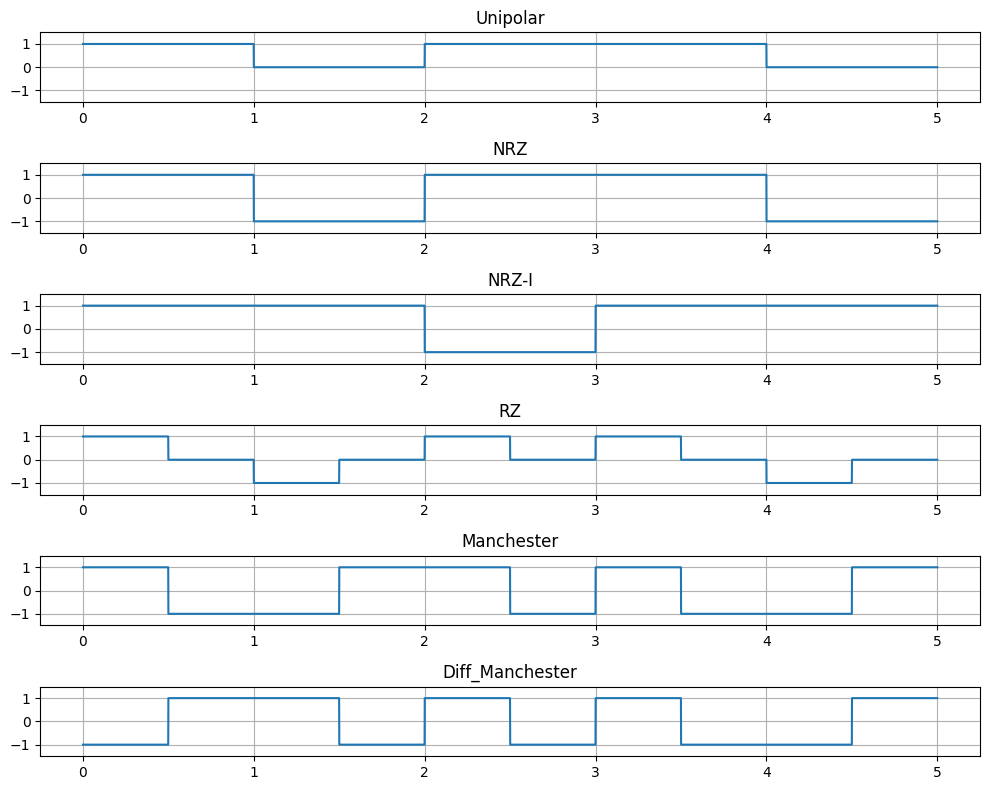

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = '10110'
bits = list(map(int, data))
sz = len(bits)
points = 1000
half = points//2
t = np.linspace(0, sz, sz*points)

unipolar = []
nrz_l, nrz_i = [], []
rz = []
manchester, diff_manchester = [], []

last_li = -1
last_ld = 1

for bit in bits:
    if bit:
        unipolar.extend([1]*points)
        nrz_l.extend([1]*points)
        last_li *= -1
        rz.extend([1]*half + [0]*half)
        manchester.extend([1]*half + [-1]*half) 
        last_ld *= -1
        diff_manchester.extend([last_ld]* half)
        last_ld *= -1
        diff_manchester.extend([last_ld]* half)
    else:
        unipolar.extend([0]*points)
        nrz_l.extend([-1]*points)
        
        rz.extend([-1]*half + [0]*half)
        manchester.extend([-1]*half + [1]*half) 
        
        diff_manchester.extend([last_ld]* half)
        last_ld *= -1
        diff_manchester.extend([last_ld]* half)

    nrz_i.extend([last_li] * points)



titles = ['Unipolar', 'NRZ', 'NRZ-I', 'RZ', 'Manchester', 'Diff_Manchester']
signals = [unipolar, nrz_l, nrz_i, rz, manchester, diff_manchester]

plt.figure(figsize=(10, 8))
for i in range(len(titles)):
    plt.subplot(len(titles), 1, i+1)
    plt.title(titles[i])
    plt.plot(t, signals[i])
    plt.xticks(np.linspace(0, sz, sz+1))
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    
plt.tight_layout()
plt.show()


# ----------------------------------------
# 3. Analog Modulation (AM, FM, PM)
# ----------------------------------------

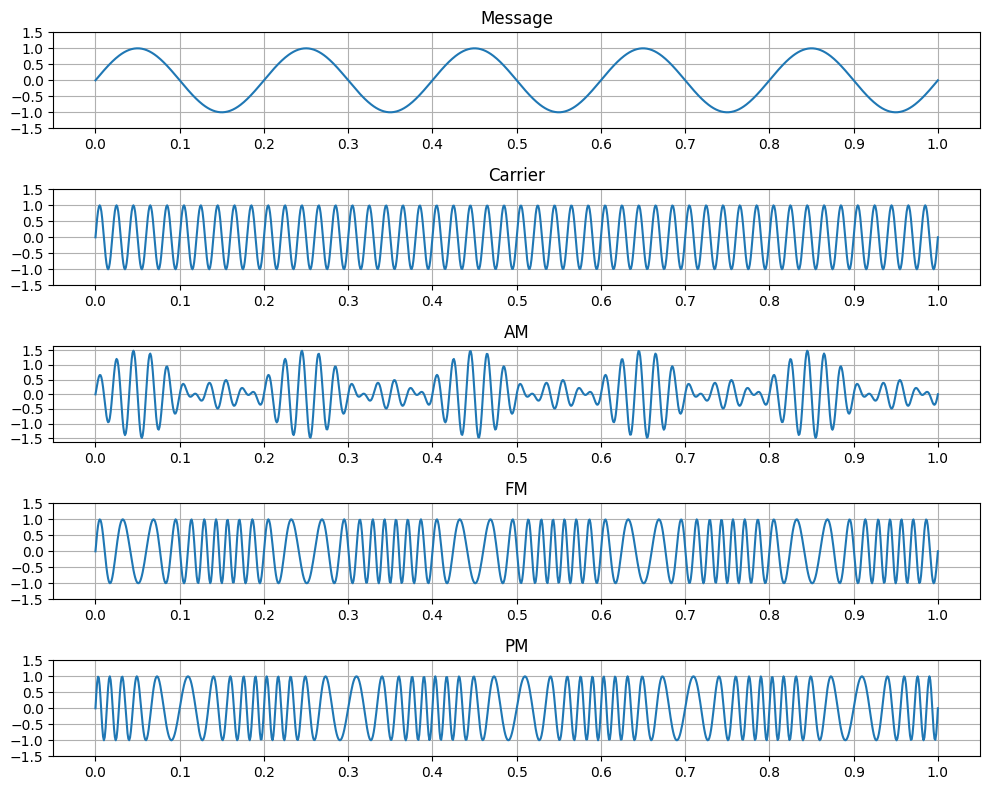

In [21]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000) 
fm, fc = 5, 50

msg_sig = np.sin(2*np.pi*fm*t)
carr_sig = np.sin(2*np.pi*fc*t)

am_sig = (0.5 + msg_sig) * carr_sig

# fm_sig = sin(2π*fc*t + kf * ​∫m(t)dt)
# pm_sig = sin(2π*fc*t + kp * m(t))
kf, kp = 150, 5
dt = t[0] - t[1]
samePart = 2*np.pi*fc*t

fm_sig = np.sin(samePart + kf * np.cumsum(msg_sig) * dt)
pm_sig = np.sin(samePart + kp * msg_sig)

titles = ['Message', 'Carrier', 'AM', 'FM', 'PM']
signals = [msg_sig, carr_sig, am_sig, fm_sig, pm_sig]

sz = len(titles)

plt.figure(figsize=(10,8))
for i in range(sz):
    plt.subplot(sz, 1, i+1)
    plt.title(titles[i])
    plt.plot(t, signals[i])
    plt.xticks(np.linspace(0, 1, fm*2+1))
    plt.yticks(np.linspace(-1.5, 1.5, 7))
    plt.grid(True)

plt.tight_layout()
plt.show()



# -----------------------------------------
# 4. Digital Modulation (ASK, FSK, PSK)
# -----------------------------------------

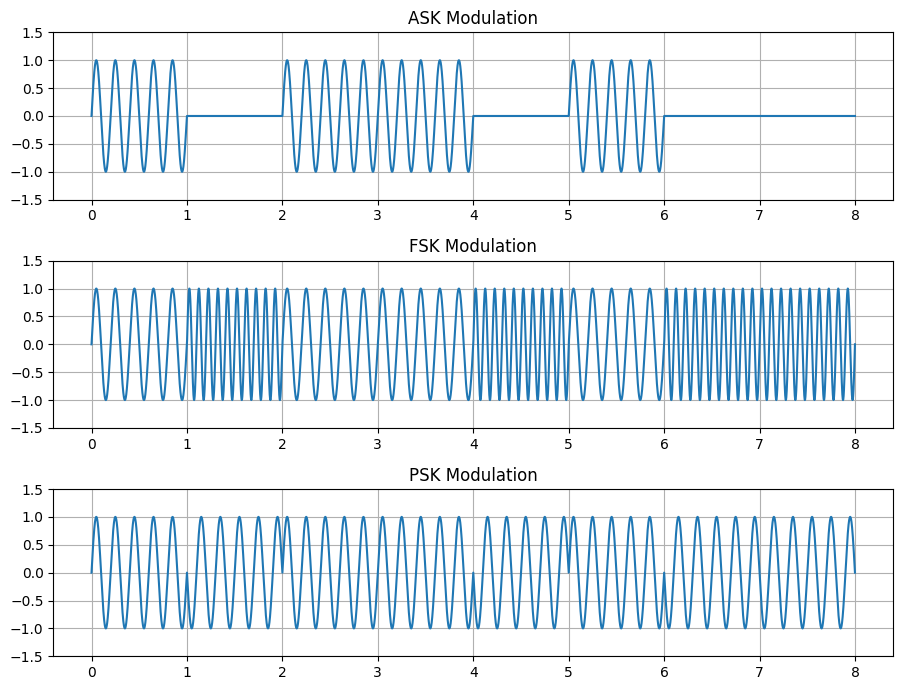

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = '10110100'
bits = list(map(int, data))
sz = len(bits); points = 1000

t_bit = np.linspace(0, 1, points) # time per bit
t = np.linspace(0, sz, sz*points) # For full signal

f0, f1 = 10, 5 # bit 0 -> f0, bit 1 -> f1
fc = 5 # carrier frequency

ask_sig, fsk_sig, psk_sig = [], [], []
common = 2* np.pi * t_bit

for bit in bits:
    if bit:
        ask_sig.extend(np.sin(common * fc))
        fsk_sig.extend(np.sin(common * f1))
        psk_sig.extend(np.sin(common * fc))
    else:
        ask_sig.extend(np.zeros(points))
        fsk_sig.extend(np.sin(common * f0))
        psk_sig.extend(np.sin(common * fc + np.pi)) # 180° phase shift
    
plt.figure(figsize=(9, 7))
title = ['ASK Modulation', 'FSK Modulation', 'PSK Modulation']
signals = [ask_sig, fsk_sig, psk_sig]


for i in range(len(title)):
    plt.subplot(3, 1, i+1)
    plt.title(title[i])
    plt.plot(t, signals[i])
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

plt.tight_layout()
plt.show()